<h2 style = 'color: #ffc300; text-align:center' ><b>EDA (Exploratory Data Analysis) & Feature Transformation</b></h2>

<li> Dealing With Numerical Columns First </li>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## setting by default graph style here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['axes.titlecolor'] = '#003049'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = '#219ebc'


## Loading the file
df = pd.read_pickle('PickleCleaning.pkl')

37


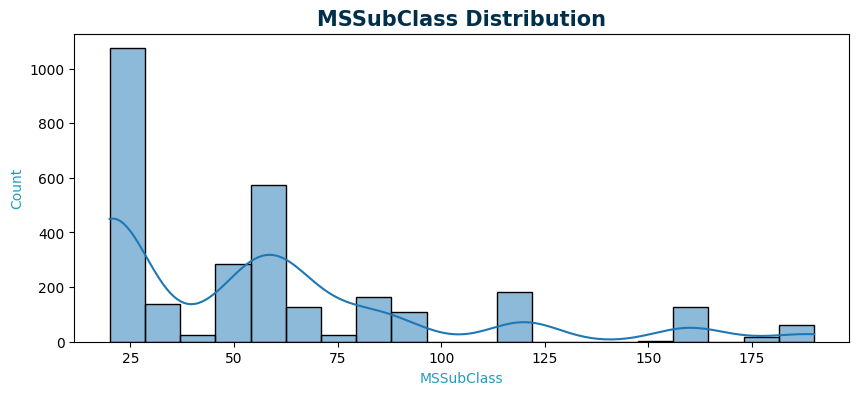

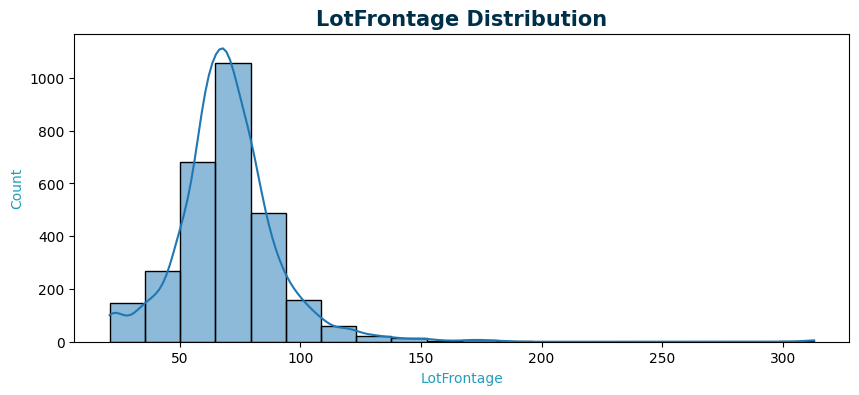

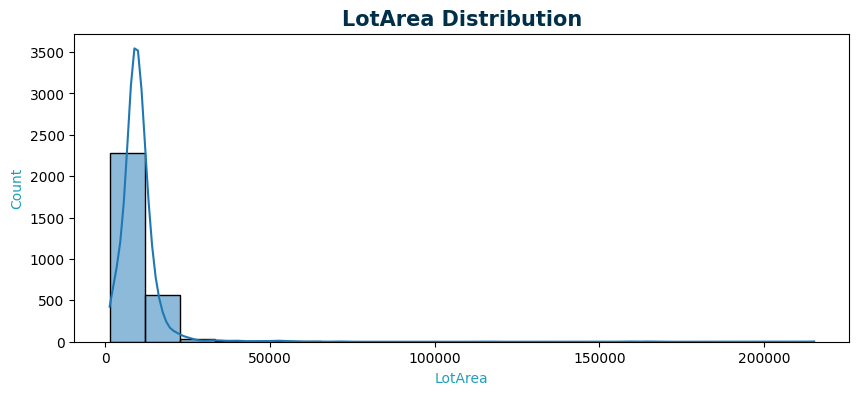

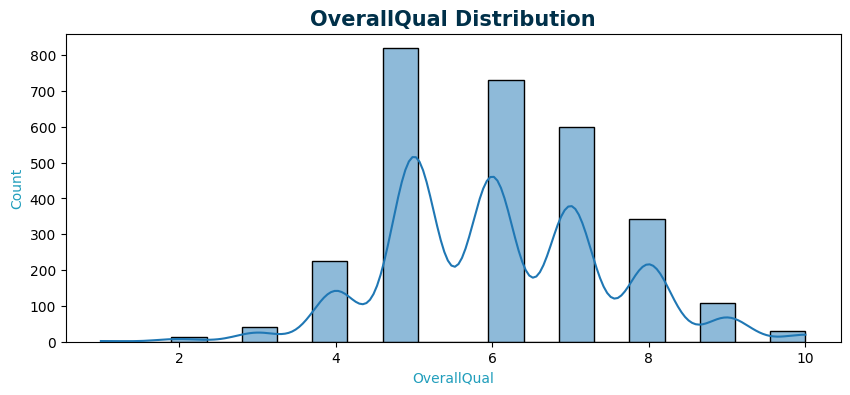

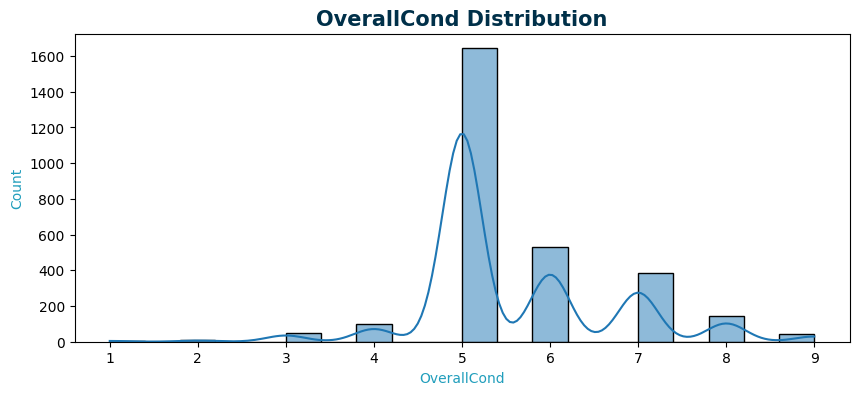

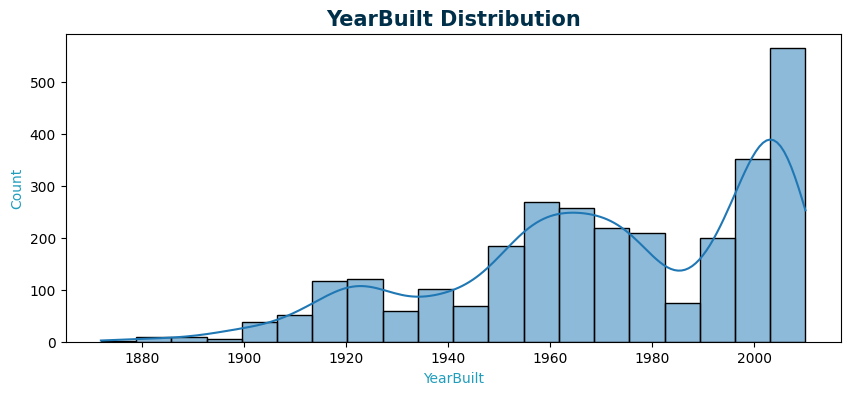

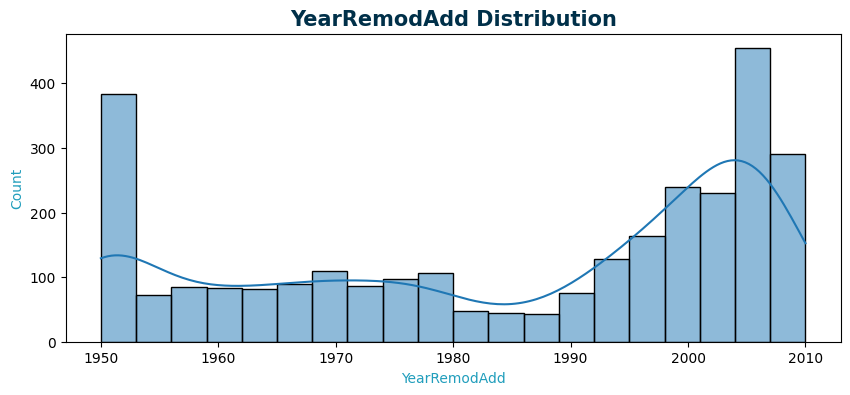

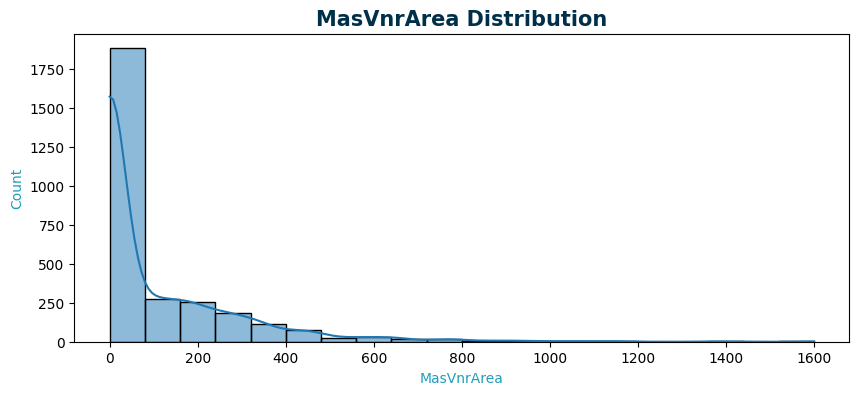

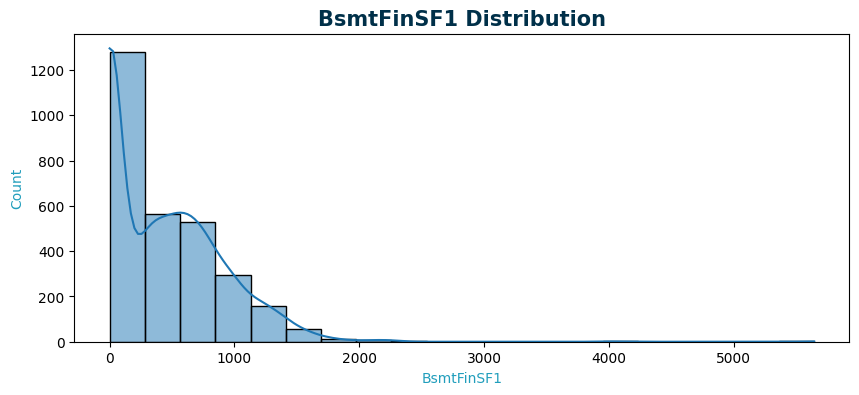

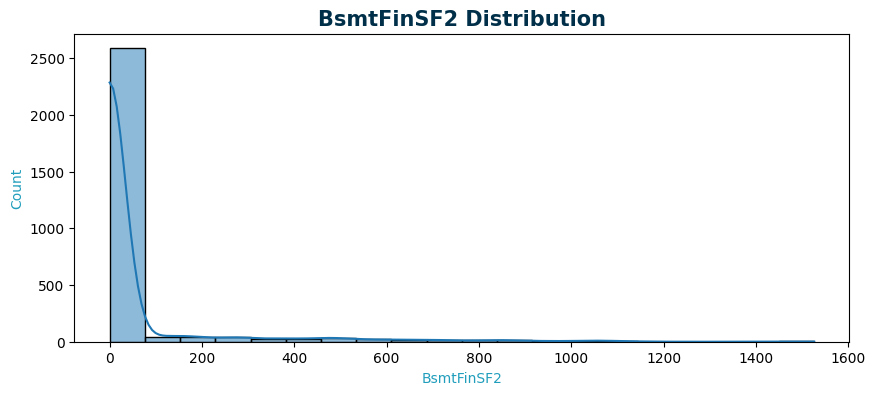

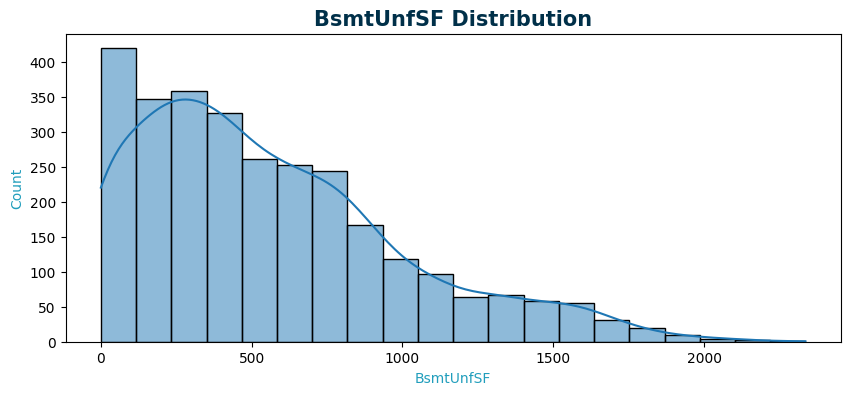

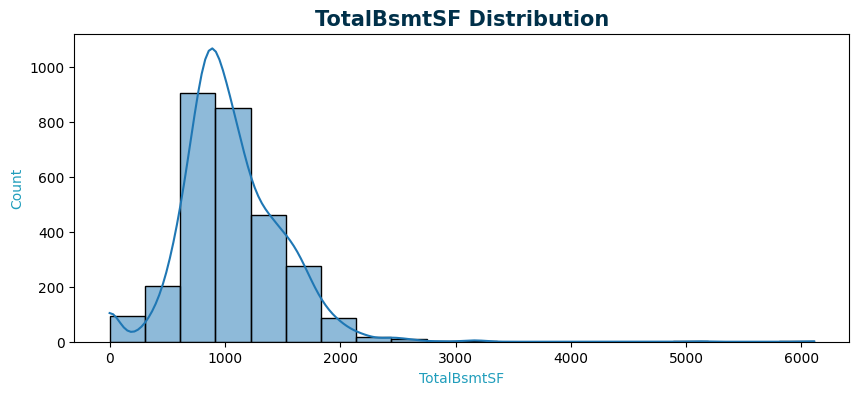

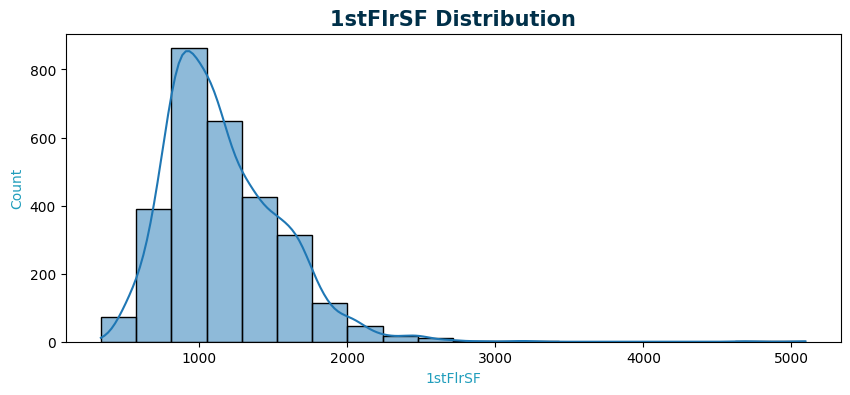

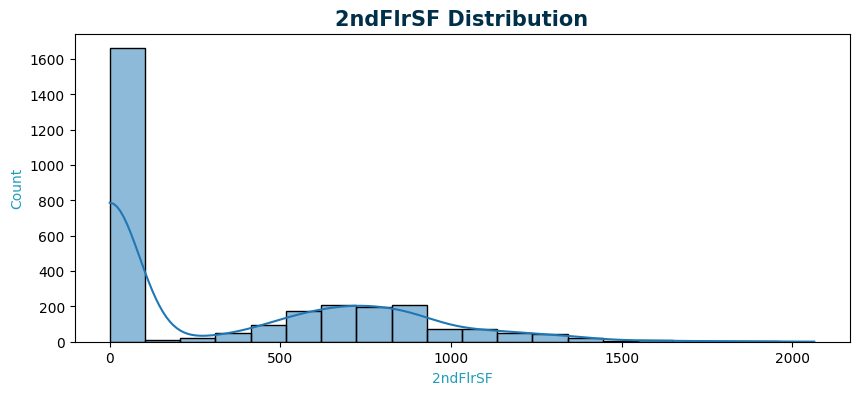

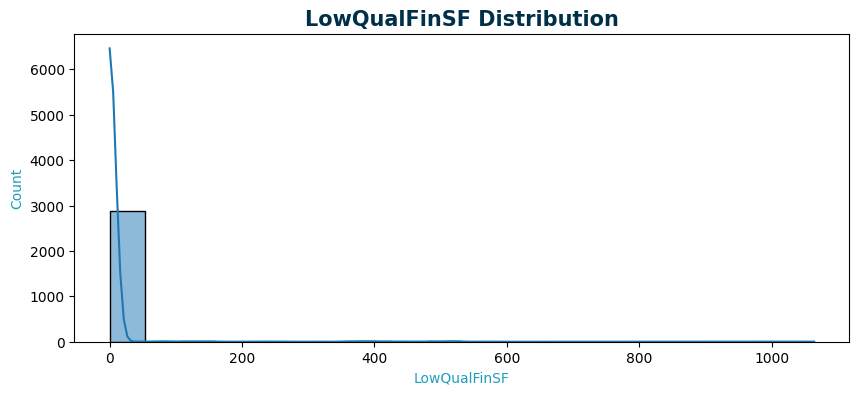

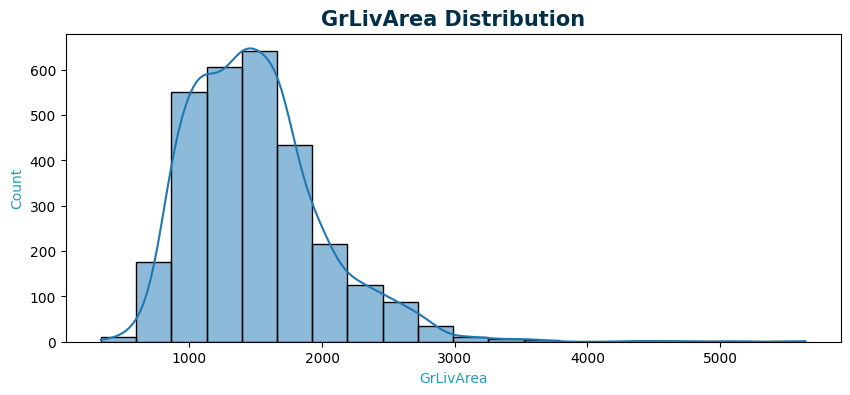

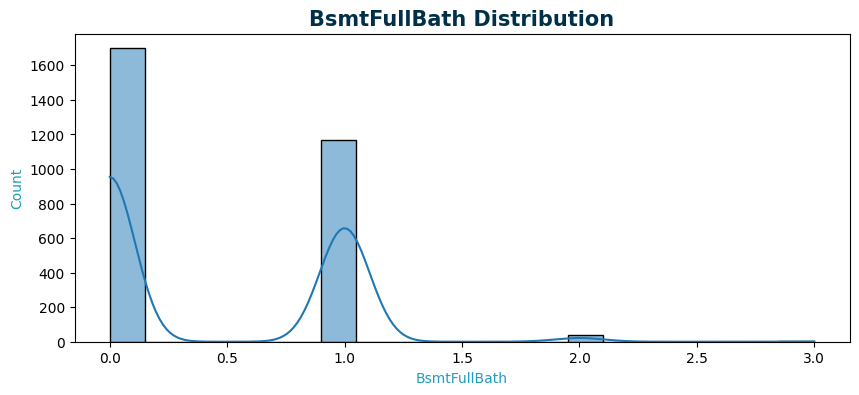

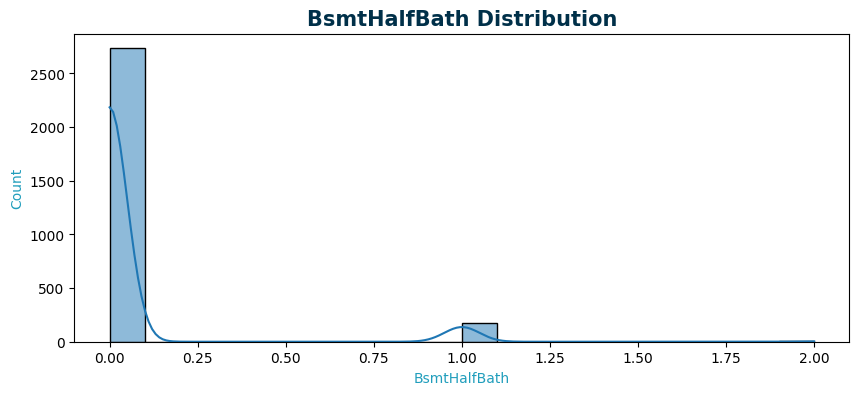

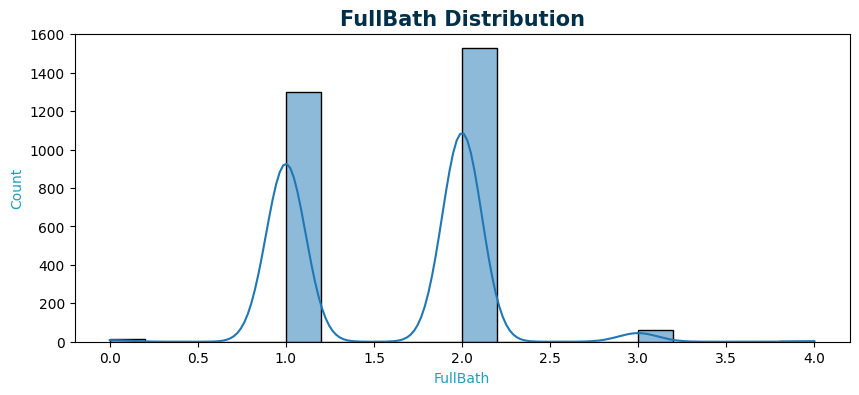

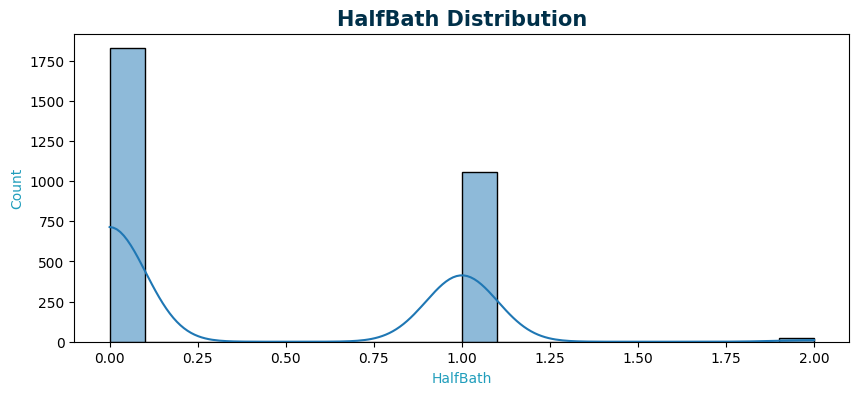

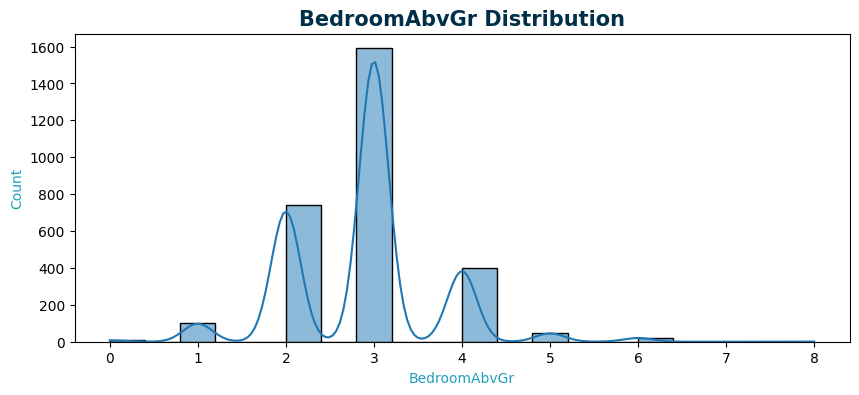

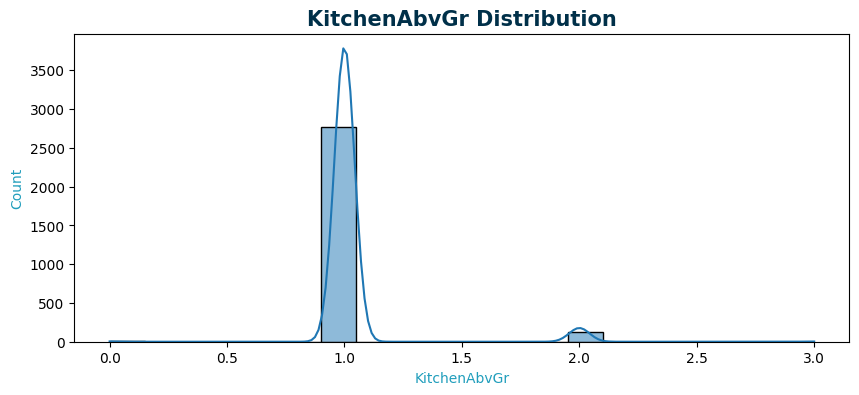

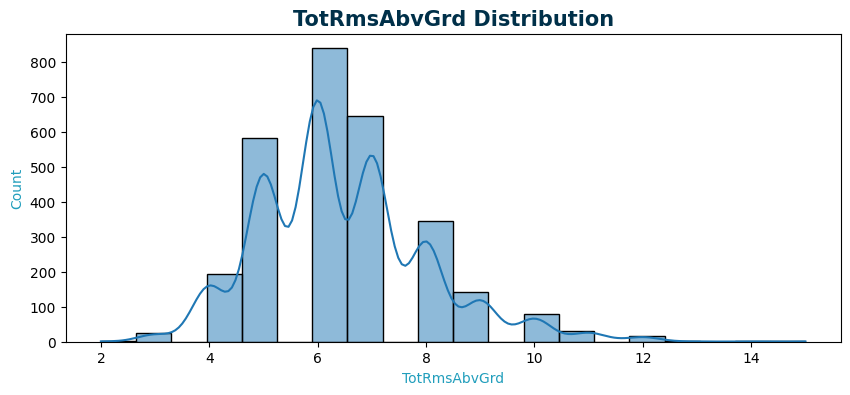

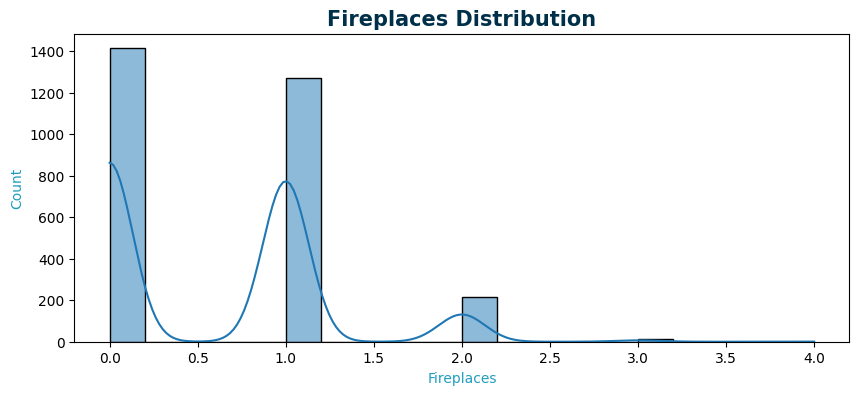

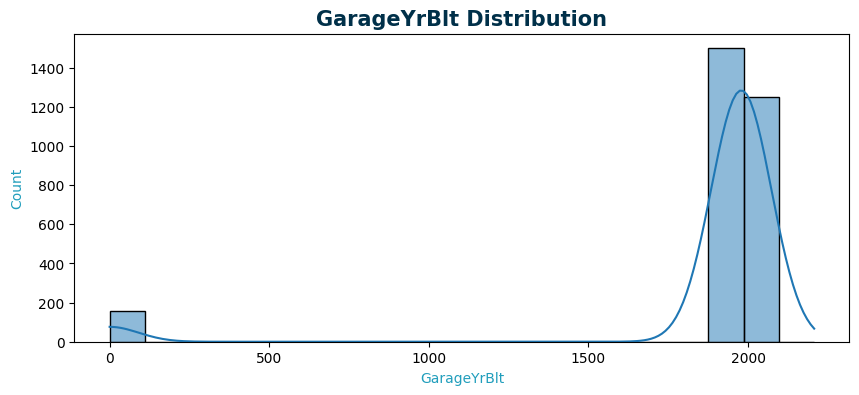

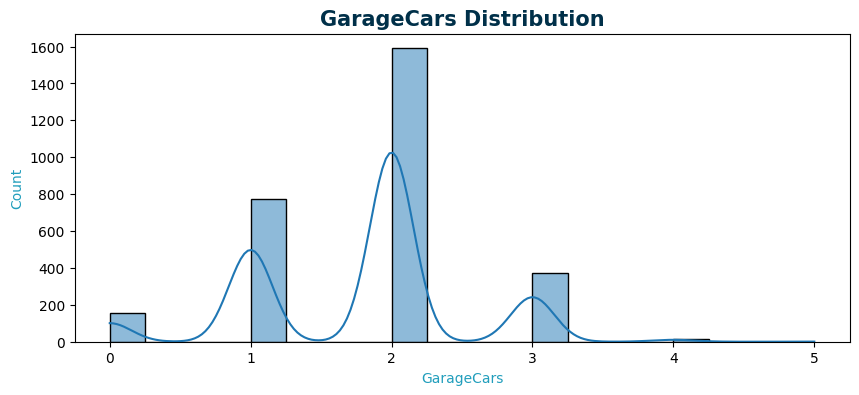

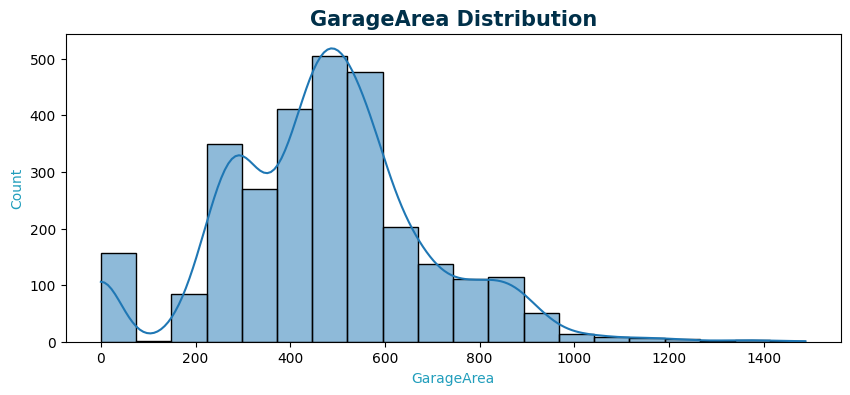

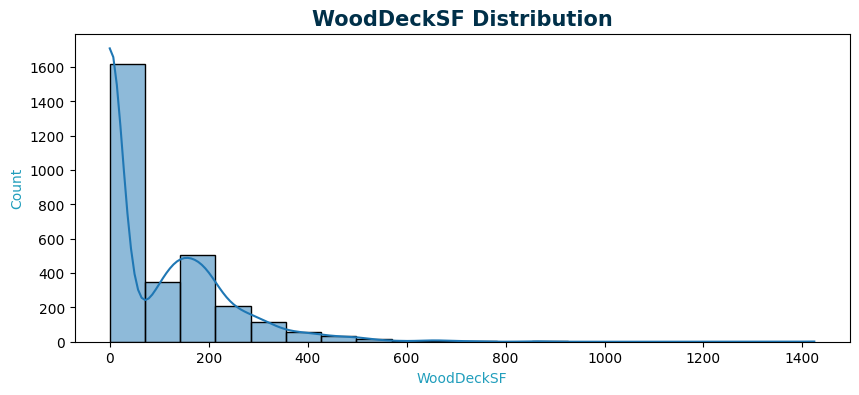

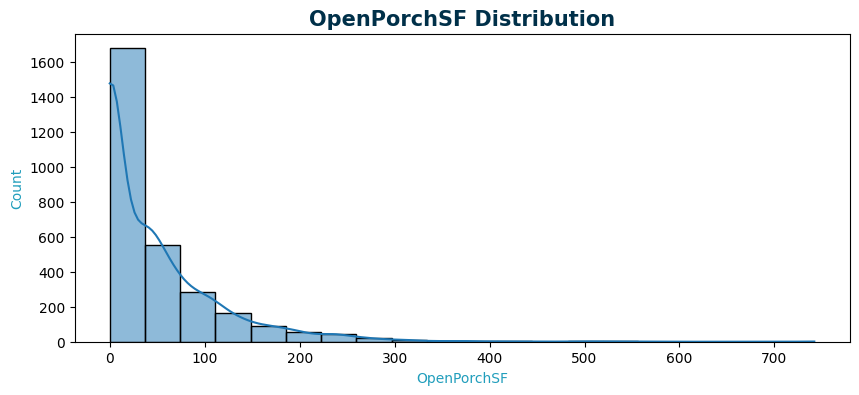

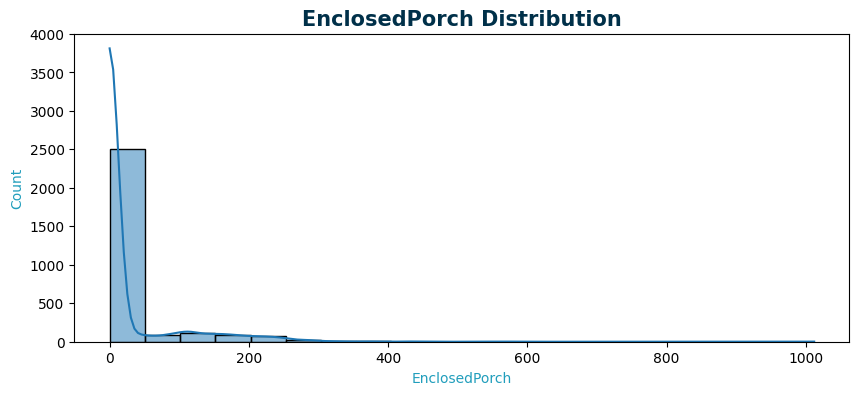

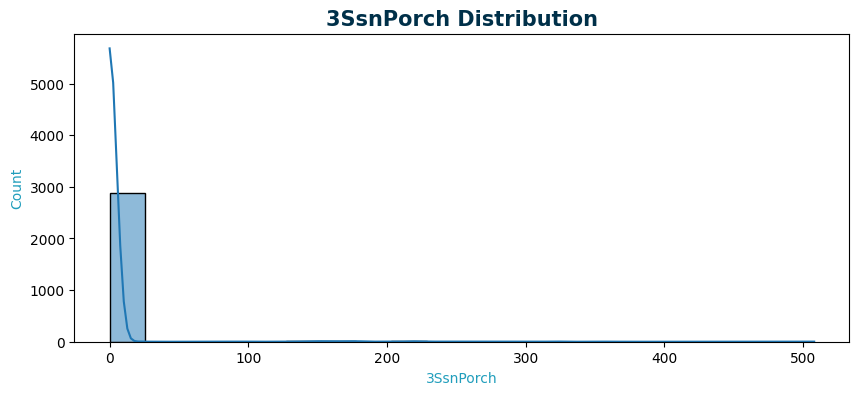

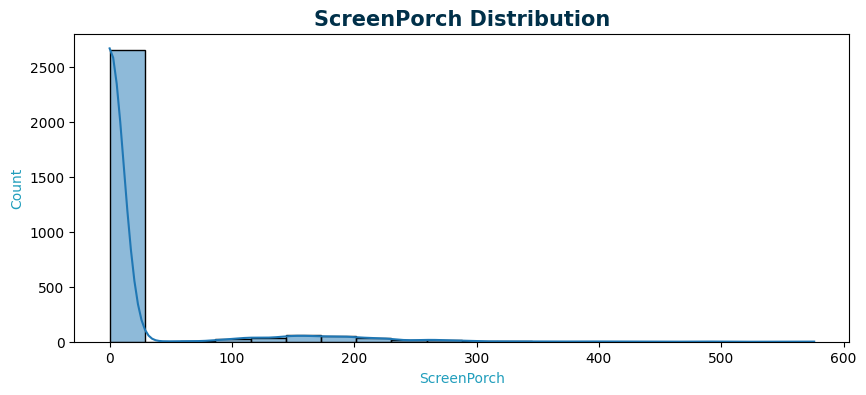

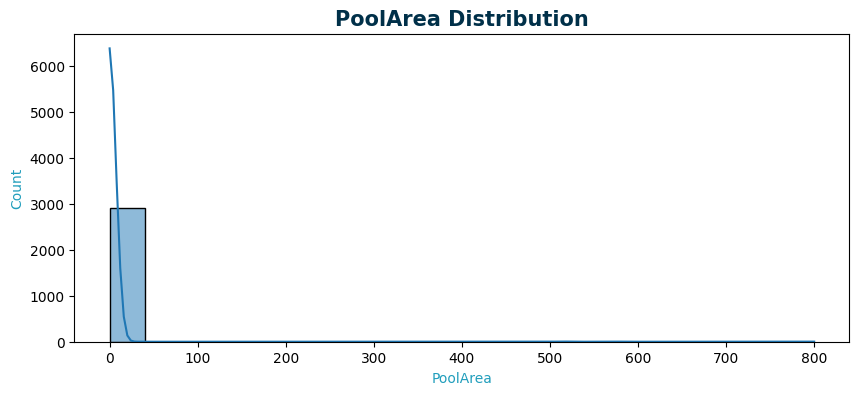

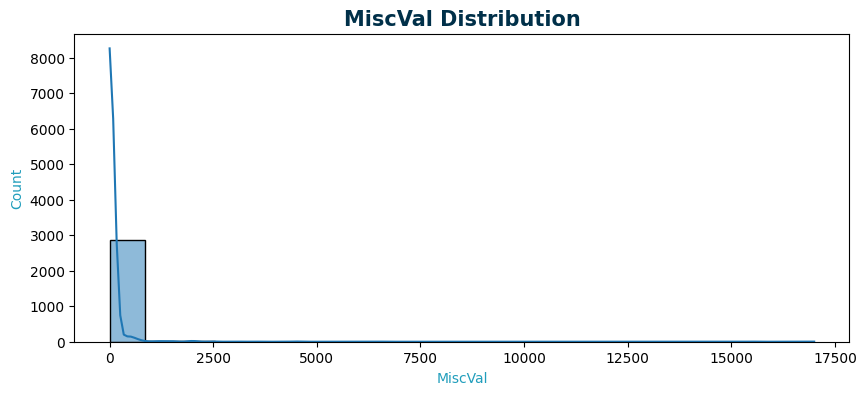

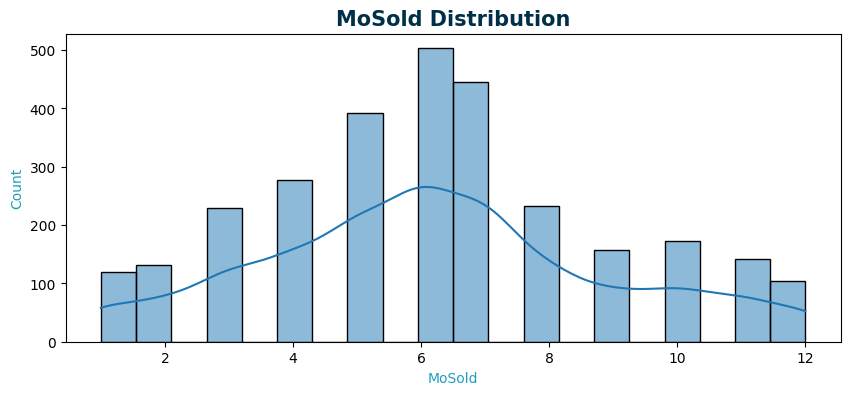

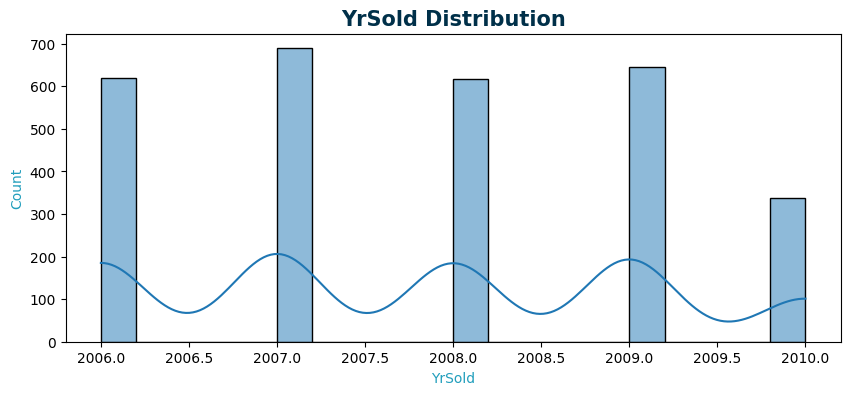

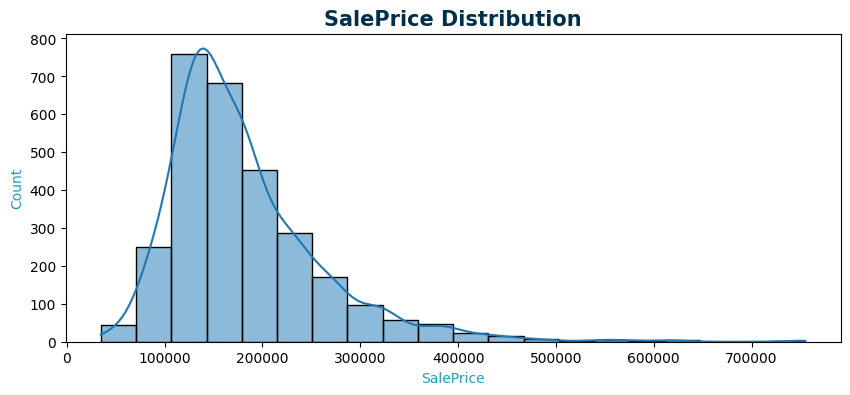

In [46]:
## Getting all the numerical columns
num_col = df.select_dtypes(exclude='object').columns.to_list()
print(len(num_col))

## code for distribution plot

for col in num_col:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=20, kde = True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.show() 

<b style = 'color: yellow'>Problem Statment</b>

![image-2.png](attachment:image-2.png)
Is data where LotFrontage > 150 (or other columns that looks similiar) are outliers?? Or represent real data, they are not outliers?<br>
Let's find out

In [47]:
## checking mean value of sale price where LotFrontage is less than 150
less_than_150_Lot = df[df['LotFrontage'] < 150]['SalePrice'].mean()
print(f'Mean Sale Price where LotFrontage is less than 150: {less_than_150_Lot }')

greater_than_150_Lot = df[df['LotFrontage'] > 150]['SalePrice'].mean()
print(f'Mean Sale Price where LotFrontage is greater than 150: {greater_than_150_Lot }')

Mean Sale Price where LotFrontage is less than 150: 180075.38504155126
Mean Sale Price where LotFrontage is greater than 150: 281691.6666666667


From above data clearly we can see that larger the LotFrontage More it's price. Hence Data is real it's not an outlier.<br>
<b style = 'color: green'>Same for other i checked it does'nt seem they are outlier</b><br>
Hence according to me this should be done : <br>
<li>LotAreaDistribution -> Right Schwed (Log Transformation applicable)</li>
<li>MasVnrArea -> Right Schwed (Log transformation applicable)</li>
<li>BsmtFinSF1 -> Right Schwed (Log Transformation applicable)</li>
<li>BsmtFinSF2 -> Right Schwed (Log Transformation applicable)</li>
<li>BsmtUnfSf -> Log Transformation may be good for model (will check without transforming too)</li>
<li>TotalBsmtSf -> Log Transformation may be good for model (will check without transforming too)</li>
<li>1stFlrSF -> Log Transformation may be good for model (will check without transforming too)</li>
<li>2ndFlrSF -> Log Transformation may be good for model (will check without transforming too)</li>
<li>LowQualFinSF -> Right Schwed (Log Transformation applicable)</li>
<li>GrLivAreaDistribution -> Log Transformation may be good for model (will check without transforming too)</li>
<li>GarageArea -> Log Transformation may be good for model (will check without transforming too)</li>
<li>WoodDeckSf -> Right Sckwed (Log Transformation applicable)</li>
<li>OpenPorchSf -> Right Sckwed (Log Transformation applicable)</li>
<li>EnclosedPorch -> RightScwed (Log Transformation applicable)</li>
<li>3SsnPorch -> Rightscwed (Log Transformation applicable)</li>
<li>ScreenPorch -> Rightschwed (Log Transformation applicable)</li>
<li>PoolArea -> Log Transformation Applicable</li>
<li>MisValDistribution -> Log Transformation Applicable</li>

In [48]:
## importing function transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
log_transform = FunctionTransformer(np.log1p)
## getting the columns that should be log transformed
log_col = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch', 'PoolArea',"MiscVal", "LotArea"]

## creating transformer for log transformation
log_tf = ColumnTransformer([('logtranform', log_transform, log_col)], remainder = 'passthrough')

## transforming the data
log_tf_val = log_tf.fit_transform(df[log_col])

# tranforming data into dataframe for replacing
log_tf_df = pd.DataFrame(log_tf_val, columns = log_col)

## assigning transformed value to original dataframe
power_trf = PowerTransformer(method='yeo-johnson')
power_log_trf = power_trf.fit_transform(df[log_col])
power_log_trf_df = pd.DataFrame(power_log_trf, columns = log_col)
power_log_trf_df




,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotArea
0,-0.148736,1.220192,0.801119,-0.36749,-0.874114,-0.391172,-0.776349,1.182512,-0.116592,0.565511,0.382250,-0.949833,0.825437,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,-0.134698
1,0.536688,-0.826737,1.015129,-0.36749,-0.420053,0.513179,0.431816,-0.865480,-0.116592,-0.370688,-0.003233,1.215796,-1.081645,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,0.118868
2,-0.004846,1.182237,0.574736,-0.36749,-0.033529,-0.242509,-0.550315,1.185107,-0.116592,0.699374,0.637983,-0.949833,0.649152,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,0.440137
3,-0.397350,-0.826737,0.145070,-0.36749,0.197833,-0.629152,-0.413993,1.159638,-0.116592,0.578088,0.780657,-0.949833,0.564074,2.324746,-0.113523,-0.310028,-0.067011,-0.190659,0.108406
4,0.706617,1.326034,0.754096,-0.36749,0.092024,0.261180,0.131016,1.220966,-0.116592,1.337847,1.568631,1.082120,0.978596,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,0.933249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,-0.296519,-0.826737,-1.356953,-0.36749,0.210175,-1.156771,-2.202728,1.096725,-0.116592,-0.817171,-2.549996,-0.949833,-1.081645,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,-2.770226
2904,0.748363,1.117205,0.220694,-0.36749,-0.391319,-1.156771,-2.202728,1.096725,-0.116592,-0.817171,-0.813841,-0.949833,0.390529,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,-2.805666
2905,-0.100354,-0.826737,1.172006,-0.36749,-2.058860,0.431997,0.337437,-0.865480,-0.116592,-0.465002,0.502249,1.352156,-1.081645,-0.431240,-0.113523,-0.310028,-0.067011,-0.190659,1.664378
2906,-0.004846,-0.826737,0.370803,-0.36749,0.268836,-0.260947,-0.384883,-0.865480,-0.116592,-1.183037,-2.549996,0.802772,0.522534,-0.431240,-0.113523,-0.310028,-0.067011,5.244979,0.288124


Now again checking their distributions

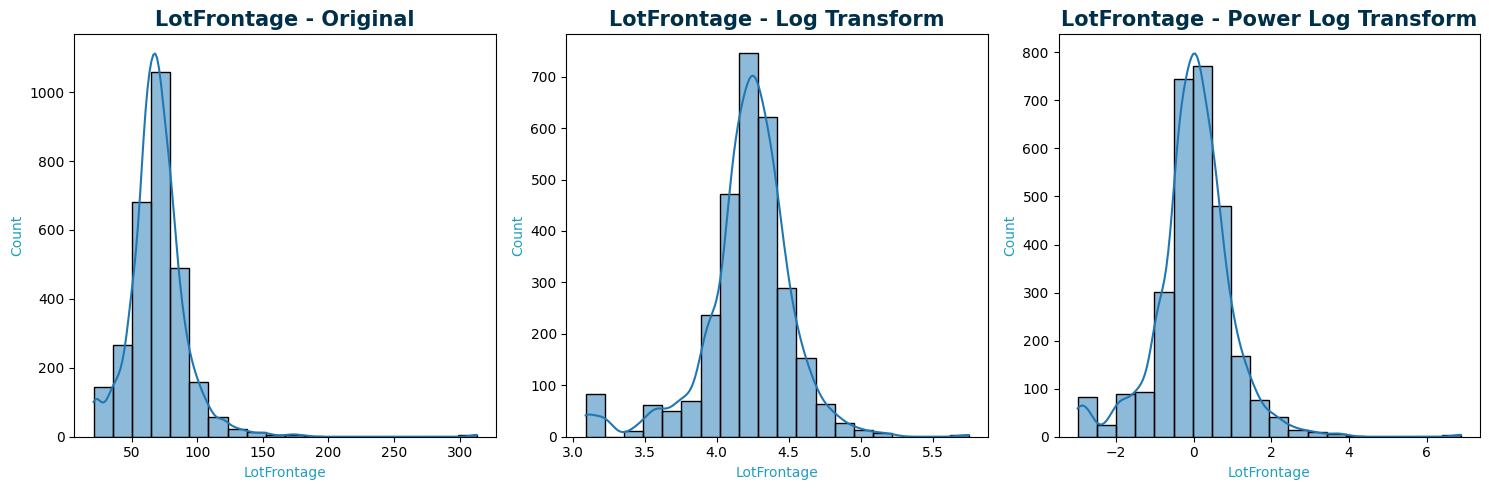

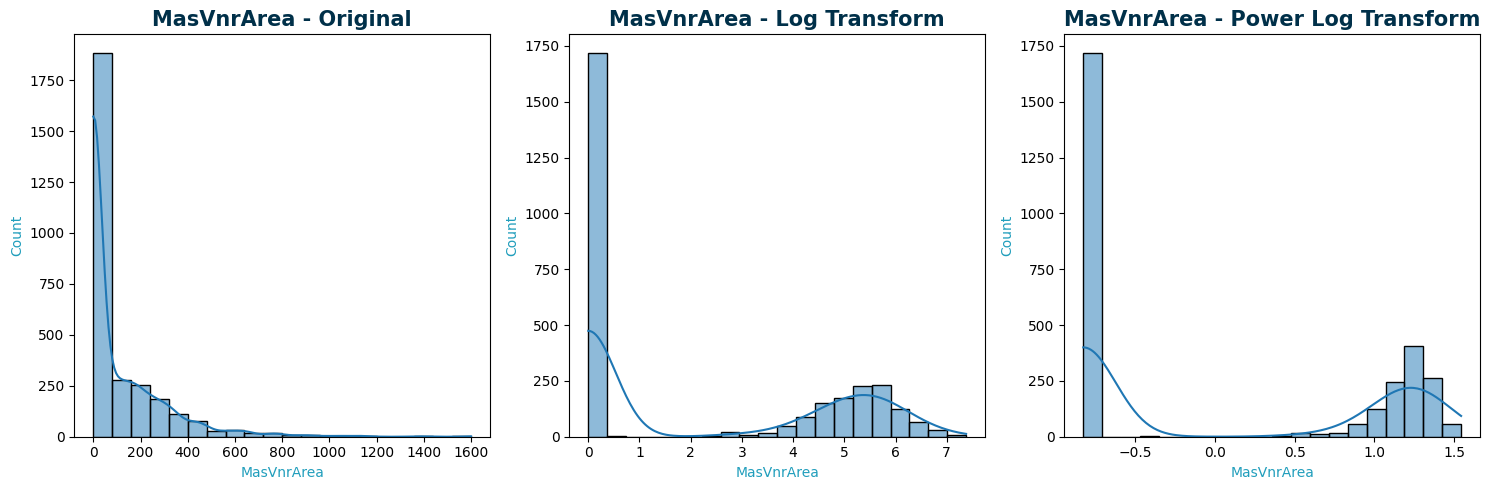

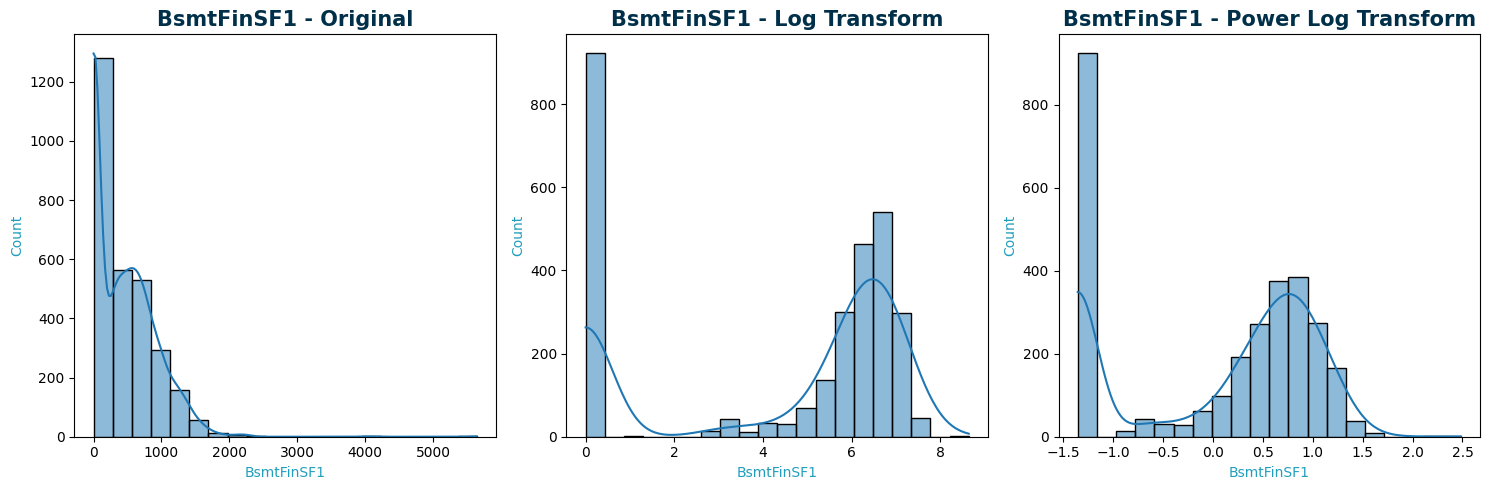

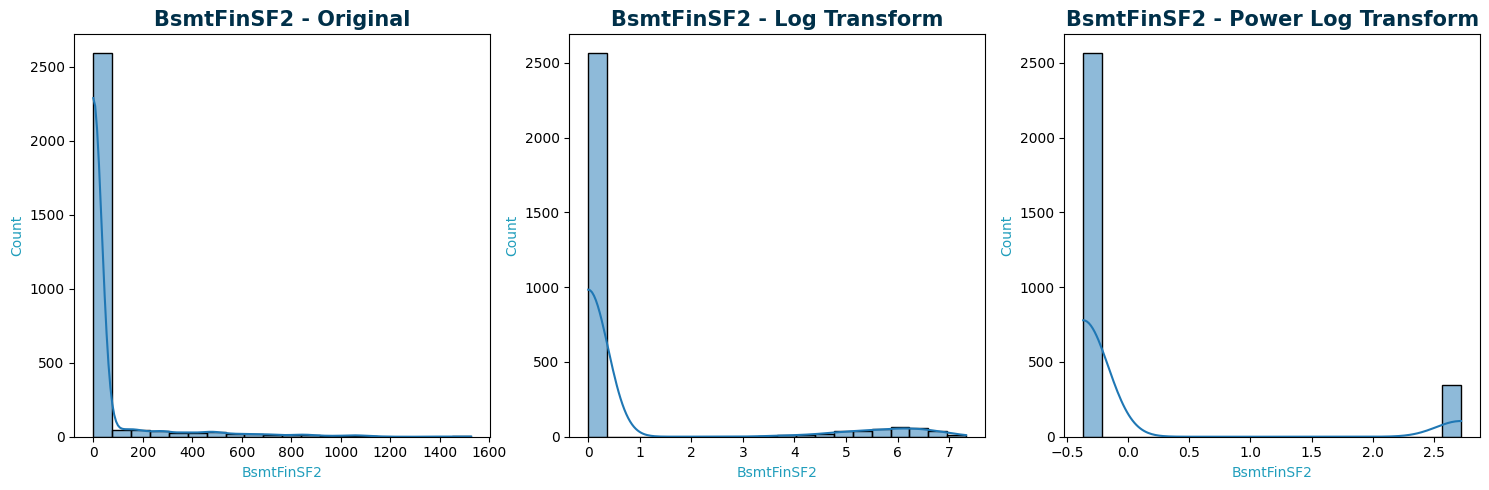

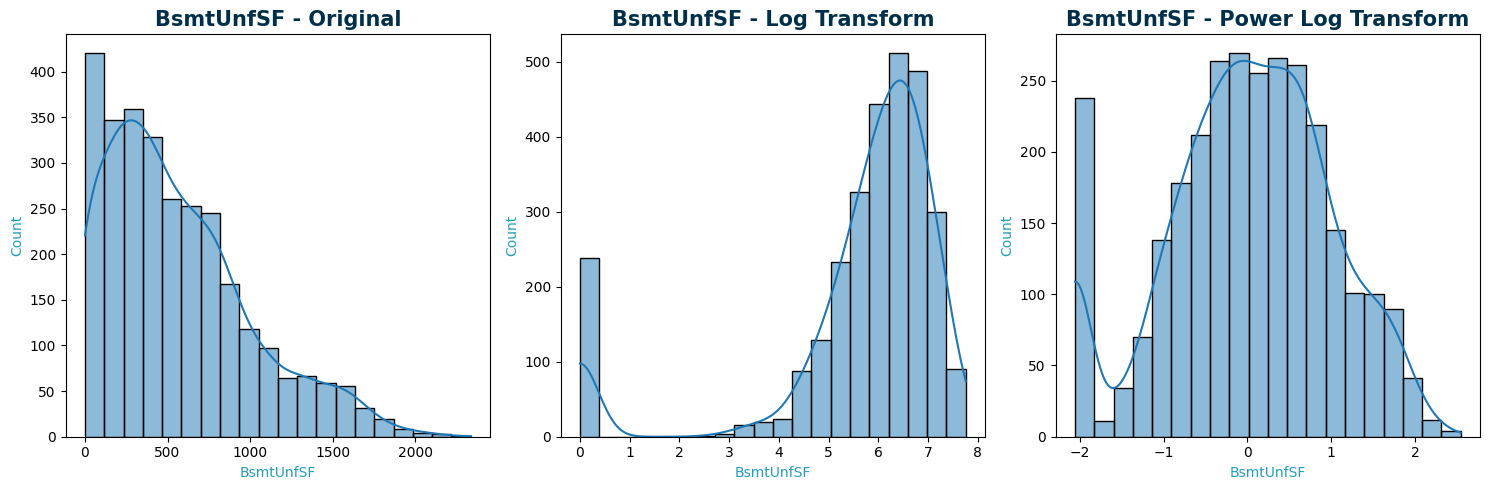

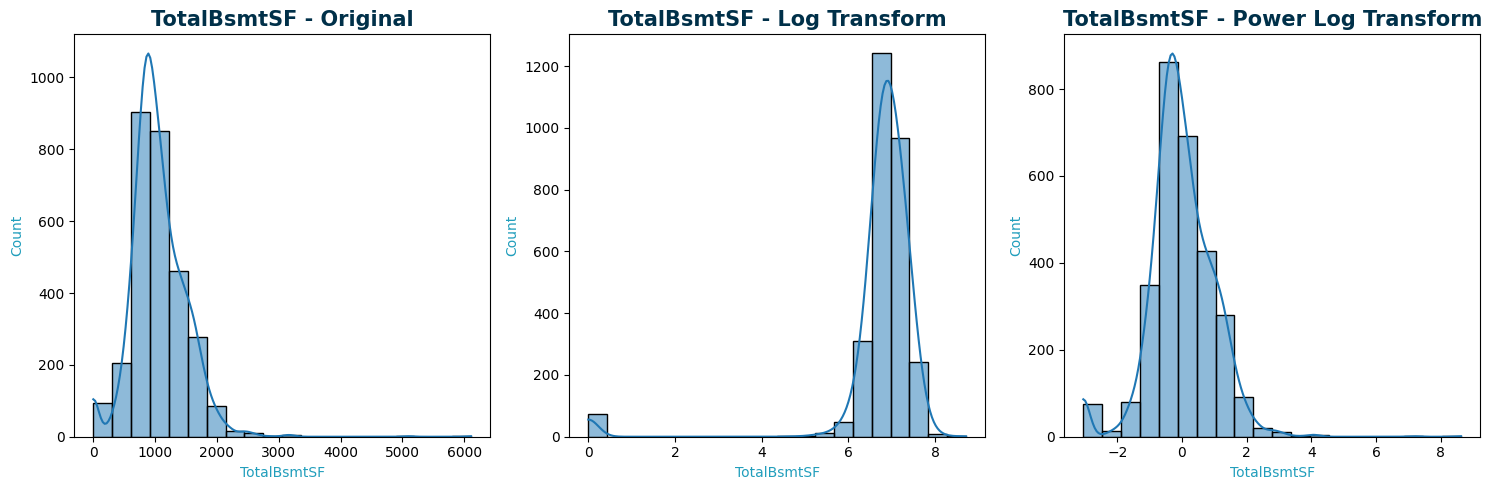

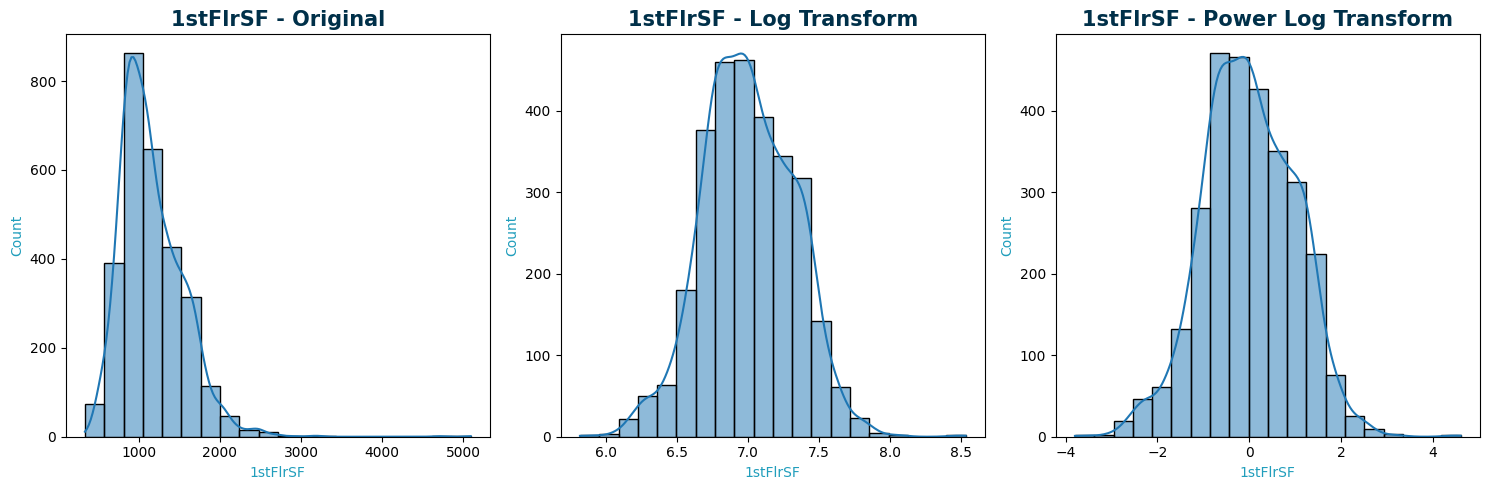

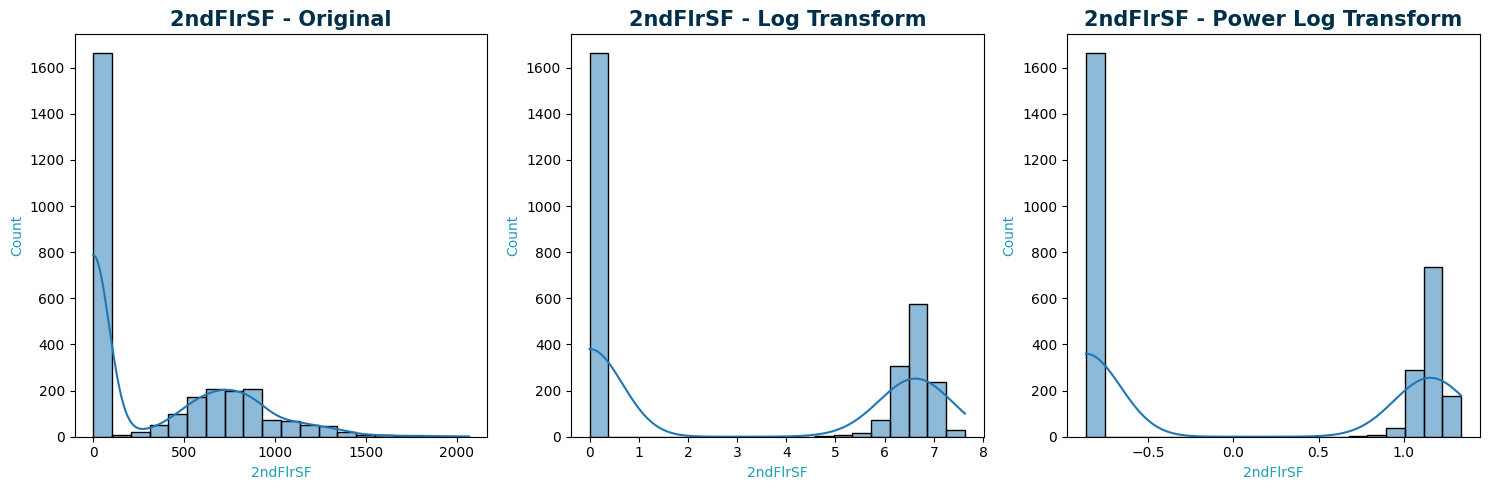

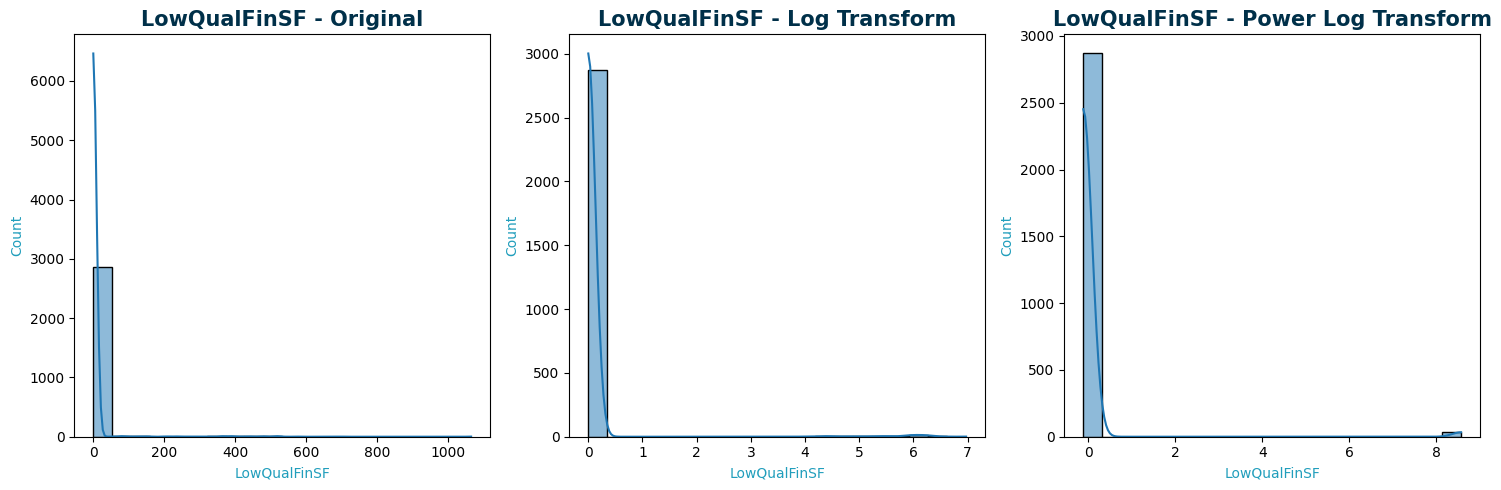

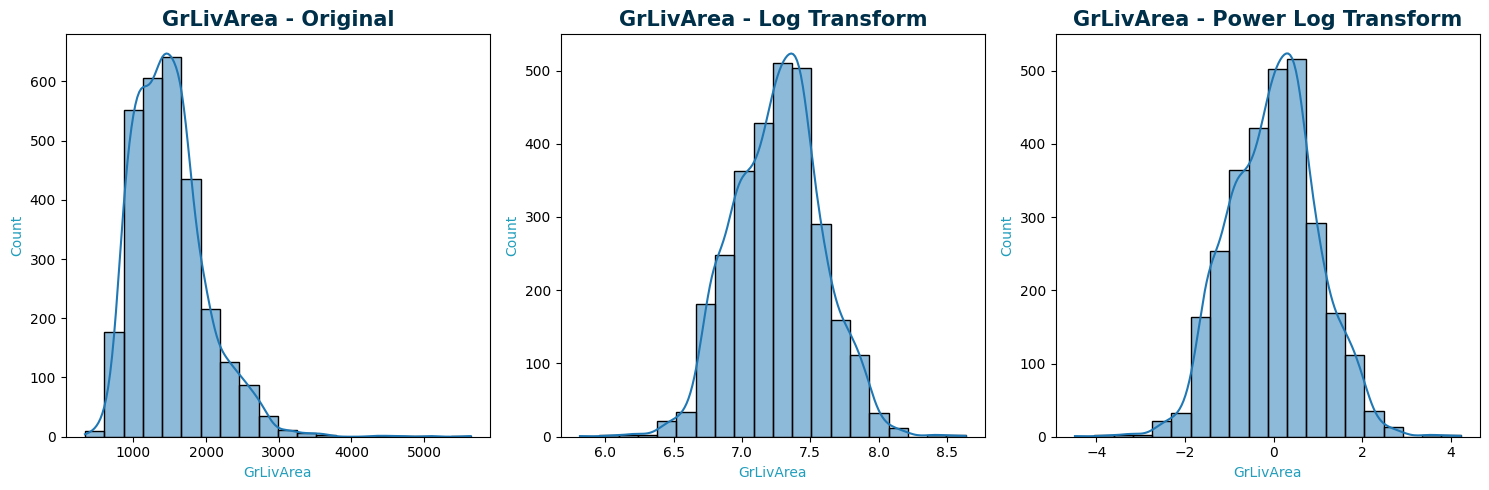

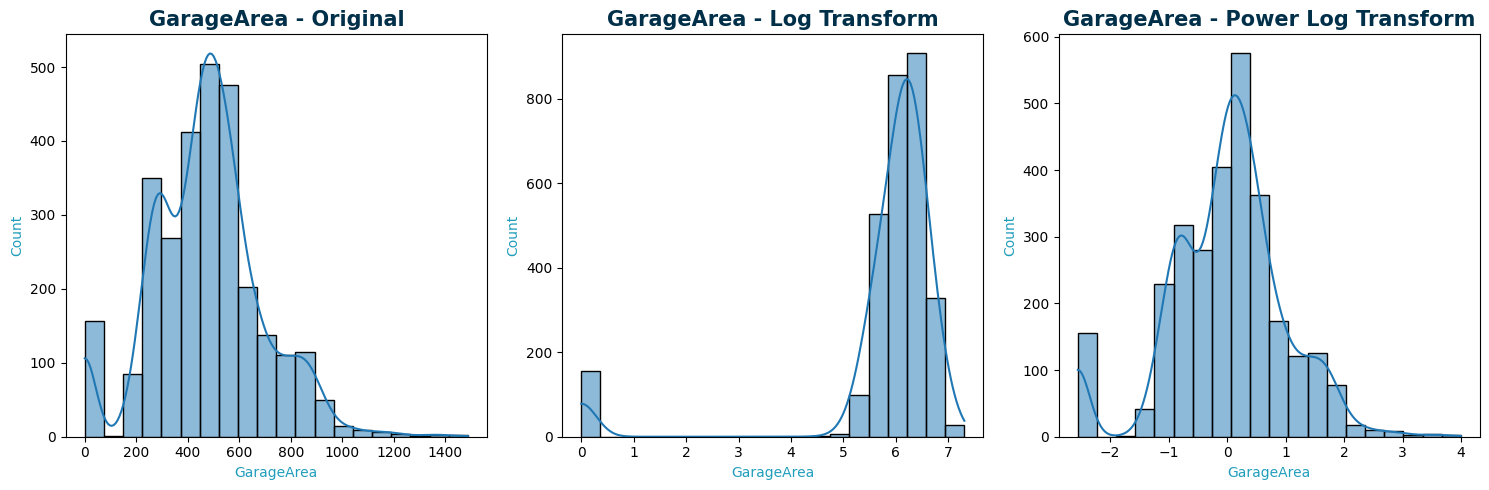

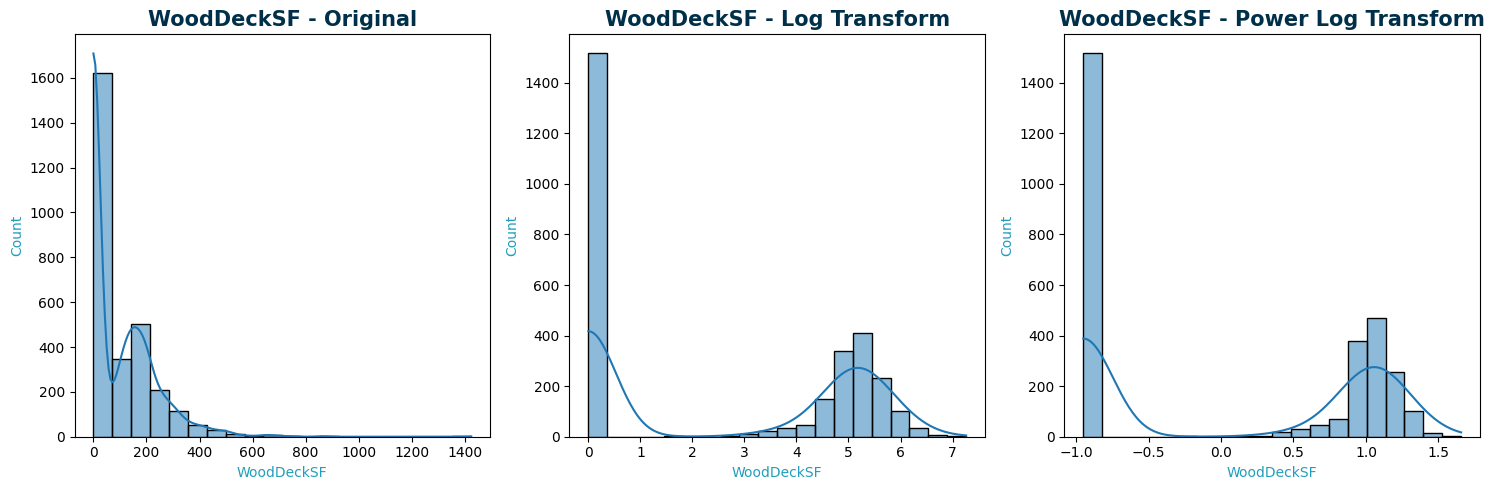

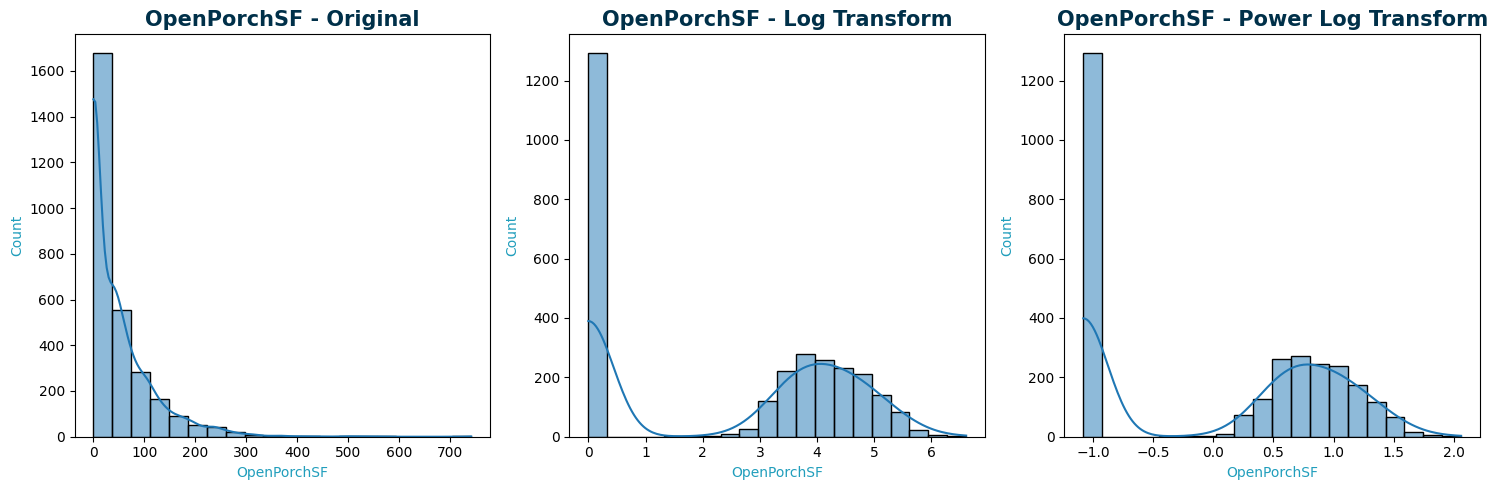

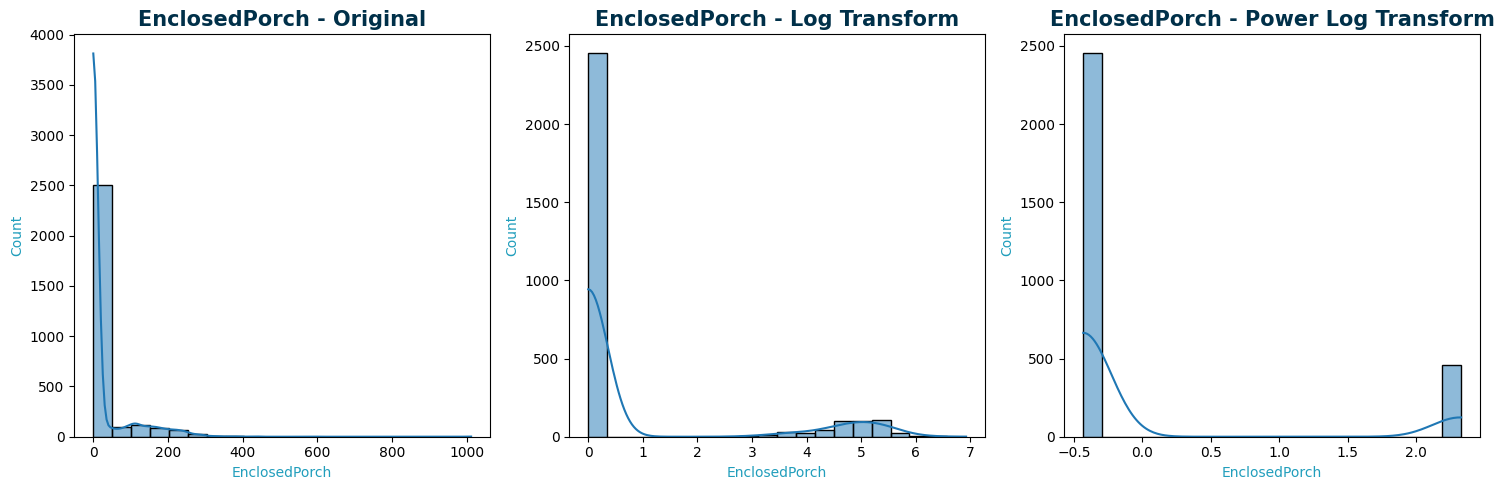

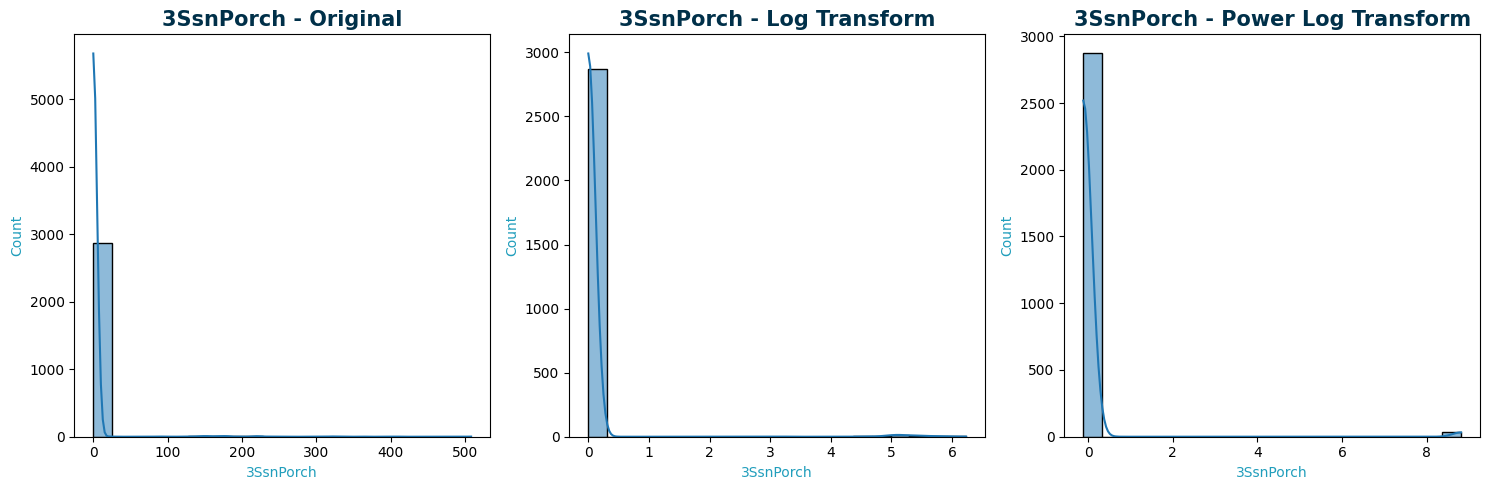

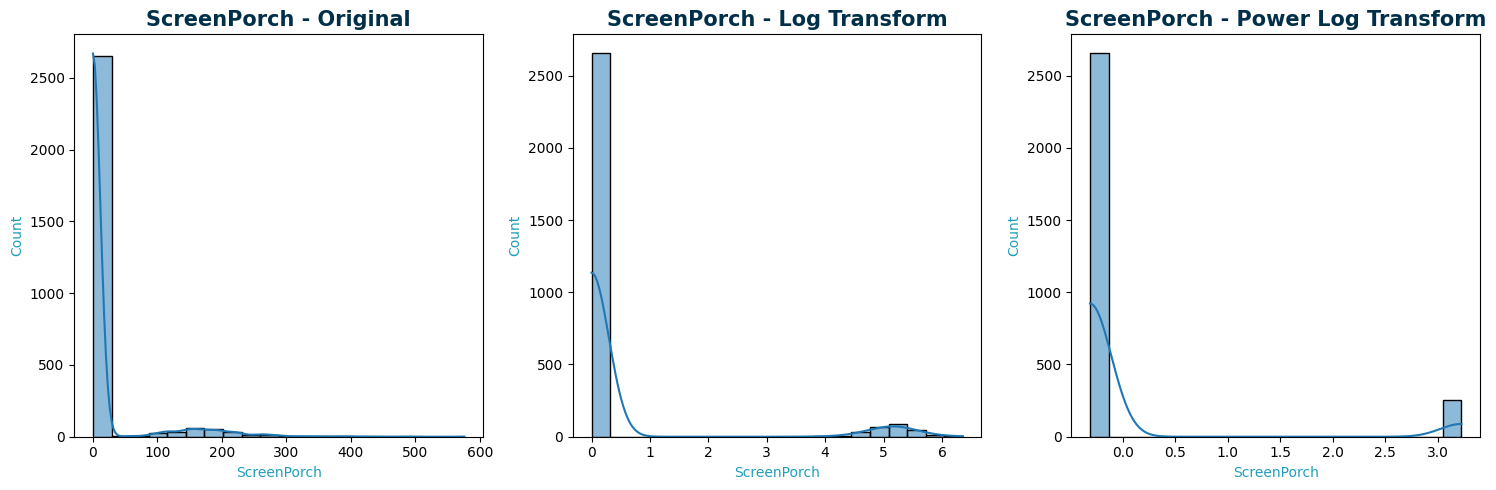

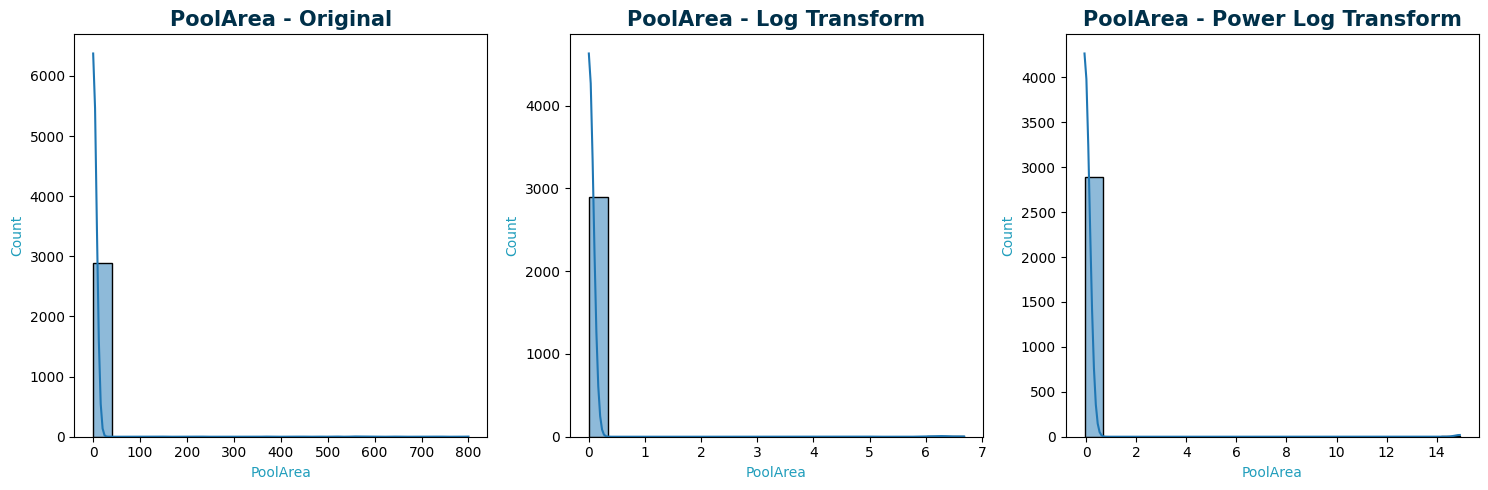

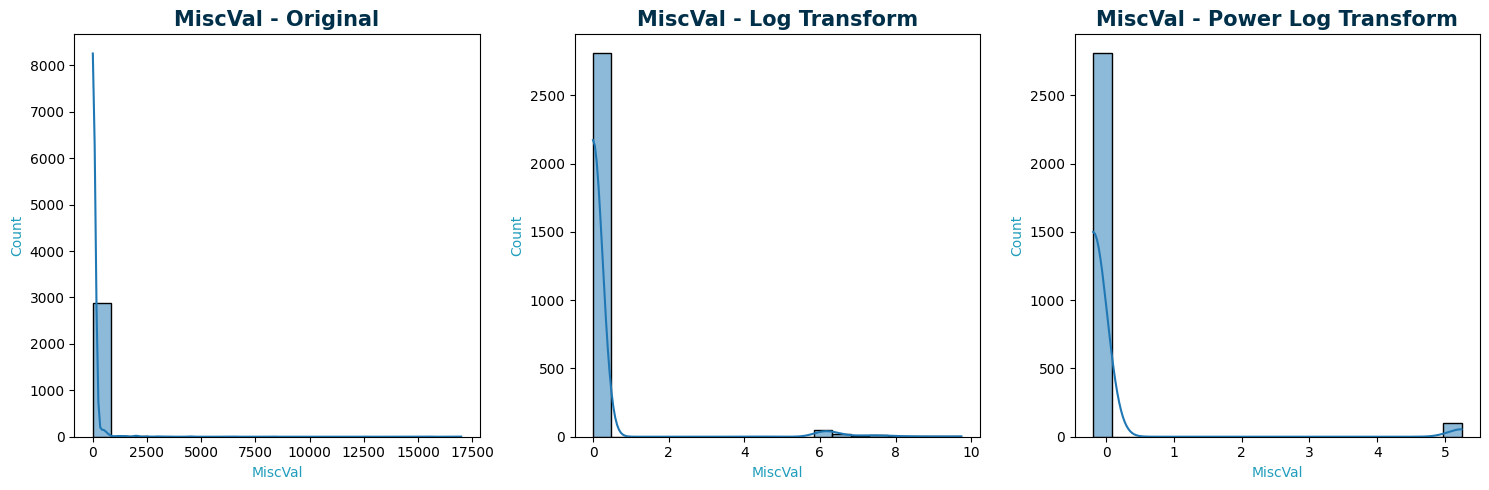

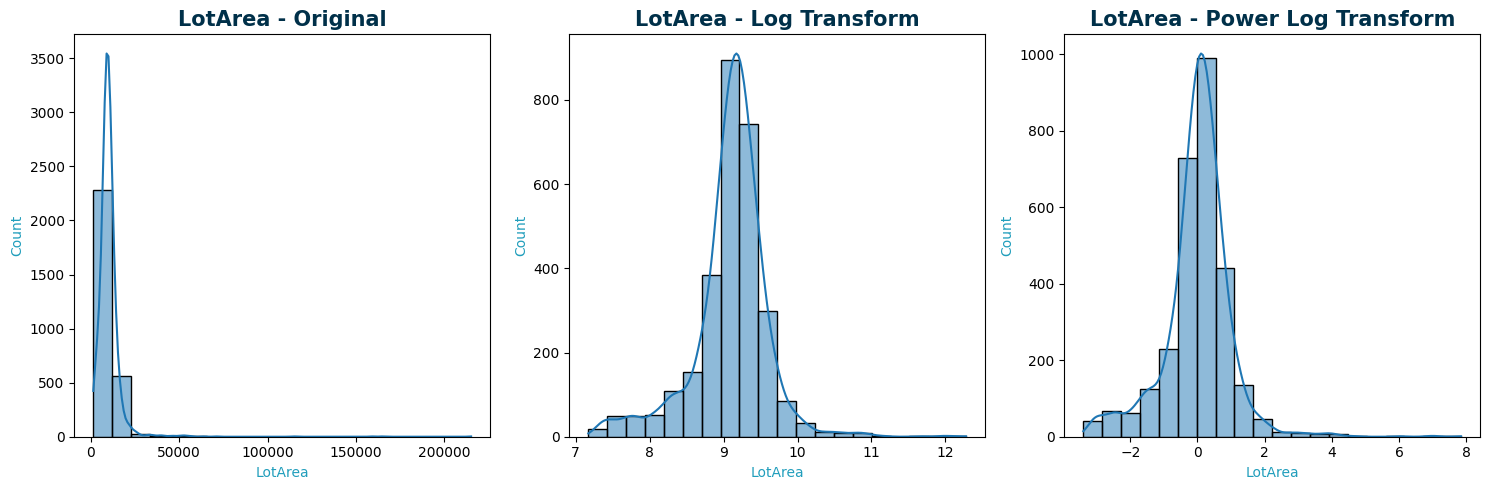

In [49]:
## Plotting histogram to see new distribution
for col in log_col:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a single row with 3 columns
    sns.histplot(df[col], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'{col} - Original')
    axes[0].set_xlabel(col)
    
    sns.histplot(log_tf_df[col], bins=20, kde=True, ax=axes[1])
    axes[1].set_title(f'{col} - Log Transform')
    axes[1].set_xlabel(col)
    
    sns.histplot(power_log_trf_df[col], bins=20, kde=True, ax=axes[2])
    axes[2].set_title(f'{col} - Power Log Transform')
    axes[2].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


PowerTransformer seems to work good applying that to my original df

In [50]:
df[log_col] = power_log_trf_df
df.shape

(2908, 80)

In [51]:
## Getting List of rest columns
rest_cols = [i for i in num_col if i not in log_col]
rest_cols.remove('SalePrice') ## Since this is Target Col
print(rest_cols)

['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']


<code>MSSubClass, OverallQual, OverallCond, </code> data looks like numerical but actually if u look in description file its actually representing categorical data that's why better i will change it as str Datatype to avoid any confusion later.

In [52]:
## changing data type to string
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('str')

In [53]:
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

<b>Now dealing with Date type features</b><code>YearBuilt, YearRemodAdd, MosSold, YrSold</code> 

<li>Here year built is not an good looking feature for except i will create another featuer using this as <code>HouseAge</code> that will make more sense to data and same for YearRemodAdd will create <code>RemodeledAge</code> feature.</li><br>
<li>Will create a new feature as SoldDate with the MosSold and YrSold</li>

In [54]:
# creating New Feature HouseAge and removing yearBuilt
from datetime import datetime as dt
df['HouseAge'] = dt.now().year - df['YearBuilt']  ## creating HouseAge

##Creating New Feature RemodelAge
df['RemodelAge'] = dt.now().year - df['YearRemodAdd']

## creating New Feature SoldDate
df['dateSold'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str))

## removing other columns
df.drop(['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis = 1, inplace= True)

Just having a look on rest num cols to decide if something need to be change ??

In [55]:
df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars
0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0
1,0.0,1.0,2,0,3,1,6,1,1976.0,2.0
2,1.0,0.0,2,1,3,1,6,1,2001.0,2.0
3,1.0,0.0,1,0,3,1,7,1,1998.0,3.0
4,1.0,0.0,2,1,4,1,9,1,2000.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,1,1,3,1,5,0,0.0,0.0
1455,0.0,0.0,1,1,3,1,6,0,1970.0,1.0
1456,1.0,0.0,1,0,4,1,7,1,1960.0,2.0
1457,0.0,1.0,1,0,3,1,6,0,0.0,0.0


Ok Nothing need to be change now (GarageYrBuilt or GarageCars) i will deal with them later since i have other plan for them (not again create GarageAge that's gimmy feature)

<li>Dealing With Cat Cols</li>

In [56]:
## getting list of cat_cols
cat_cols = [col for col in df.columns if col not in num_col]
print(cat_cols)
print(len(cat_cols))


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'HouseAge', 'RemodelAge', 'dateSold']
46


So it's looks like we have to deal with a large number of columns

Now we will use python libarary ProfileReport for further EDA process. It helps us to do EDA part easily and in detail way

After EDA process i understood my data deeply

In [57]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [58]:
## again saving this file for Further Process
import pickle
df.to_pickle('EDA.pkl')